In [ ]:
# Are word counts correlated with profit margin
## Simplistic View

## Talk about how easy this is to do, not much programming required

## 

## Re-iterate where text data comes from

## Scoll to 120%

In [ ]:
%pip install "calcbench-api-client[Pandas, Backoff, BeautifulSoup]" tqdm scipy seaborn statsmodels

In [2]:
import pandas as pd

from tqdm.notebook import tqdm
import qgrid

from scipy.special import expit
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from collections import Counter
from typing import Iterable

import calcbench as cb


cb.enable_backoff()
tqdm.pandas(desc="progress")

In [3]:
disclosure_embeddings = pd.read_pickle(
    r"C:\Users\andre\Dropbox (Calcbench)\andrew\sp_500_tokenize_embeddings.pkl"
)

In [4]:
def distance(word_counts: Counter, category_words: Iterable[str]):
    return sum(count for word, count in word_counts.items() if word in category_words)

In [5]:
category_distances = disclosure_embeddings.progress_applymap(
    lambda word_counts: distance(word_counts, ["inflation", "supply"])
)

progress:   0%|          | 0/14940 [00:00<?, ?it/s]

In [ ]:
tickers =cb.tickers(index="SP500") # can use any list of tickers

In [6]:
metric="GrossProfitMargin" # Can use any of the calcbench standardized metrics

profit_margin = cb.standardized_data(
    company_identifiers=cb.tickers(index="SP500"),
    metrics=[metric],
    all_history=True,
    period_type="annual",
)["GrossProfitMargin"]

In [13]:
tickers = =cb.tickers(index="SP500") # can use any list of tickers

SIC_code = cb.standardized_data(
    company_identifiers=tickers,
    metrics=["SIC_code"],
    all_history=True,
    period_type="annual",
)

In [20]:
one_digit_SIC_codes = pd.to_numeric(
    SIC_code["SIC_code"].iloc[0] // 1000, downcast="integer"
).astype(str)
one_digit_SIC_codes.name = "SIC_Code"

In [7]:
md_a_diff = (
    category_distances.ManagementsDiscussionAndAnalysis
    - category_distances.ManagementsDiscussionAndAnalysis.shift()
)

In [8]:
profit_margin_change = profit_margin - profit_margin.shift()

In [9]:
d = (
    pd.DataFrame(
        data={
            "profit_margin_change": expit(profit_margin_change.stack()),
            "inflation_count_change": expit(md_a_diff).stack(),
        }
    )
    .swaplevel()
    .sort_index()
)

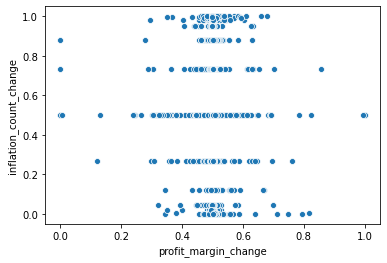

In [11]:
sns.scatterplot(x="profit_margin_change", y="inflation_count_change", data=d)

In [29]:
inflation_word_count_2020 = category_distances.ManagementsDiscussionAndAnalysis.iloc[-2]

In [30]:
SIC_word_counts = pd.DataFrame(
    data={
        "SIC_code": one_digit_SIC_codes,
        "inflation_word_count": inflation_word_count_2020,
    }
)

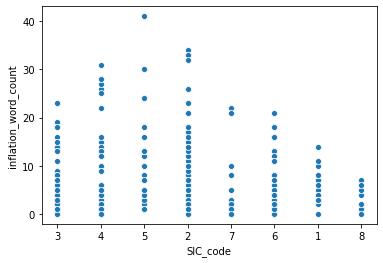

In [34]:
sns.scatterplot(x="SIC_code", y="inflation_word_count", data=SIC_word_counts)